In [1]:
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

## Exercise generator

Find the centroid (vector mean)

$\bar c = \frac{1}{n}\sum_{i=1}^{n} \bar v^{(i)}$

First, in 2D.

v^(0) = (-6, 5)
v^(1) = (8, 8)
v^(2) = (7, 5)
v^(3) = (-1, -2)
v^(4) = (2, -1)
v^(5) = (-6, -9)

v^(c) = (0.6666666666666666, 1.0)


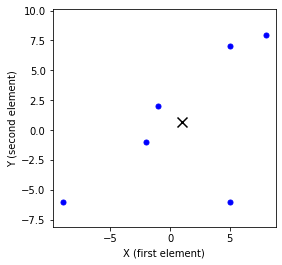

In [2]:
n_vectors = np.random.randint(3, 8)
vectors = [np.vstack(np.random.randint(-9, 9, size=2)).T for i in range(n_vectors)]
centroid = np.mean(np.concatenate(vectors, axis=0), axis=0)

plt.figure(figsize=(4, 4))
for i, v in enumerate(vectors):
  print("v^(%i) = %s" % (i, tuple(list(v.ravel()))))
  plt.scatter(v.ravel()[1], v.ravel()[0], c='b', marker='.', s=100)
print()
print("v^(c) = %s" % repr(tuple(list(centroid.ravel()))))
plt.scatter(centroid[1], centroid[0], c='k', marker='x', s=100, cmap='coolwarm')
plt.ylabel("Y (second element)")
plt.xlabel("X (first element)")
plt.axis('equal')
plt.show()

In 3D and above.

In [3]:
n_dim = np.random.randint(2, 6)
n_vectors = np.random.randint(2, 6)
vectors = [np.vstack(np.random.randint(-9, 9, size=n_dim)).T for i in range(n_vectors)]
centroid = np.mean(np.concatenate(vectors, axis=0), axis=0)

for i, v in enumerate(vectors):
  print("v^(%i) = %s" % (i, tuple(list(v.ravel()))))
print()
print("v^(c) = %s" % repr(tuple(list(centroid.ravel()))))

v^(0) = (8, -1, -4, 2)
v^(1) = (3, 0, -3, 4)
v^(2) = (4, 0, -3, -9)
v^(3) = (-5, -4, 8, 8)
v^(4) = (8, 1, 0, -1)

v^(c) = (3.6, -0.8, -0.4, 0.8)


Matrix multiplication

In [4]:
m, n, o = np.random.randint(2, 4, size=3)
A = np.random.randint(-9, 9, size=(n, o))
B = np.random.randint(-9, 9, size=(o, m))
C = np.matmul(A, B)
print("A in R^(%i,%i)" %(n, o))
print(A)
print("B in R^(%i,%i)" %(o, m))
print(B)
print("Calculate: A x B = C")
print()
print("C in R^(%i,%i)" %(n, m))
print(C)

A in R^(2,3)
[[ 6 -6 -9]
 [-1 -3 -9]]
B in R^(3,3)
[[ 3 -7  6]
 [ 5  2  0]
 [-3 -1  2]]
Calculate: A x B = C

C in R^(2,3)
[[ 15 -45  18]
 [  9  10 -24]]


Matrix transpose

In [5]:
m, n = np.random.randint(2, 6, size=2)
A = np.random.randint(-9, 9, size=(m, n))
print("A in R^(%i,%i)" %(m, n))
print(A)
print("Calculate the transpose of A")
print()
print("A^T in R^(%i,%i)" %(n, m))
print(A.T)

A in R^(2,5)
[[ 0  7  2 -1  5]
 [ 2 -3  1 -7 -1]]
Calculate the transpose of A

A^T in R^(5,2)
[[ 0  2]
 [ 7 -3]
 [ 2  1]
 [-1 -7]
 [ 5 -1]]


## Re-implementation of matrix multiplication

In [6]:
result = np.zeros((A.shape[0], B.shape[1]))
result

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
def my_matrix_multiplication(A, B):
  assert A.shape[1] == B.shape[0], "Error 3409583094358"
  result = np.zeros((A.shape[0], B.shape[1]))
  for i in range(A.shape[0]): # rows
    for j in range(B.shape[1]): # columns
      sum = 0
      for k in range(B.shape[0]): # dot product
        sum += A[i, k]*B[k, j]
      result[i, j] = sum
  return result

m, n, o = np.random.randint(2, 4, size=3)
A = np.random.randint(-9, 9, size=(n, o))
B = np.random.randint(-9, 9, size=(o, m))
C = my_matrix_multiplication(A, B)

assert np.all(np.isclose(np.matmul(A, B), A.dot(B)))
assert np.all(np.isclose(np.matmul(A, B), C))
print("A", A)
print("B", B)
print("C", C)

A [[ 2  6  3]
 [-7 -3  4]]
B [[ 3 -2 -6]
 [-9  3  1]
 [-7  0 -7]]
C [[-69.  14. -27.]
 [-22.   5.  11.]]
